# Logica Fuzzy
Lógica Booleana : 0 ou 1
Logica Fuzzy :  Falso, Meio Falso, Meio Verdadeiro, Verdadeiro

In [2]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.6 MB/s eta 0:00:00


# Problema
- Uma empresa de alimentos deseja saber a vlidade real de um seus produtos em função da temperatura e umidade relativa do ambiente de armazenamento.
- A validade máxima desse produto é de 60 dias se armazenado a baixa temperatura em ambiente seco.
- Modelar a validade do produto com base na Temperatura (T) e Umidade Relativa (UR) do depósito. A Temperatura é um valor entre 0 e 40°C, a UR entre 0 e 100% e validade de 0 a 60 dias.

## Variaveis de Entrada
- Temperatura :
    - Intervalo de Valores : [0,40]
    - Linguistica : Fria, Amena e Quente
- Umidade Relativa :
    - Intervalo de Valores : [0, 100]
    - Linguistica : Baixa, Média e Alta

## Variaveis de Saida
- Validade :
    - Intervalo de Valores : [0,60]
    - Linguistica : Curta, Aceitável e Longa

## Regras
- Se a temperatura é fria E a umidade é baixa ENTAO a validade é longa
- Se a temperatura é quente ou umidade é alta ENTAO a vlidade é curta
- Se a umidade é média ENTAO a validade é aceitável
    

In [3]:
# Fuzzificação
# Criação das Variaveis
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')
moisture = ctrl.Antecedent(np.arange(0, 101, 1), 'moisture')
validity = ctrl.Consequent(np.arange(0, 61, 1), 'validity')

In [4]:
# Funções de Pertinência
temperature['cold'] = fuzz.trapmf(temperature.universe, [0,0,10,22])
temperature['mild'] = fuzz.gaussmf(temperature.universe, 22, 5)
temperature['hot'] = fuzz.trapmf(temperature.universe, [25,30,40,40])

moisture['low'] = fuzz.trapmf(moisture.universe, [0,0,20,60])
moisture['medium'] = fuzz.trapmf(moisture.universe, [20,50,60,80])
moisture['high'] = fuzz.trimf(moisture.universe, [60,100, 100])

validity['short'] = fuzz.trapmf(validity.universe, [0,0,5,30])
validity['acceptable'] = fuzz.trimf(validity.universe, [10,30,50])
validity['long'] = fuzz.trapmf(validity.universe, [30,50,60,60])

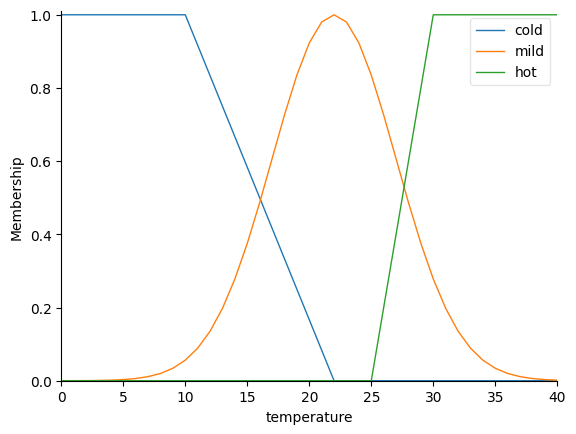

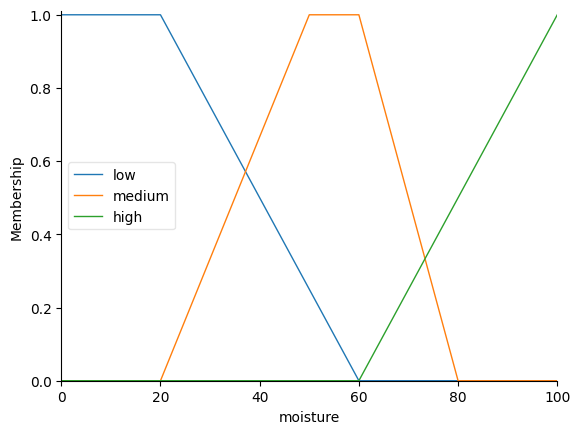

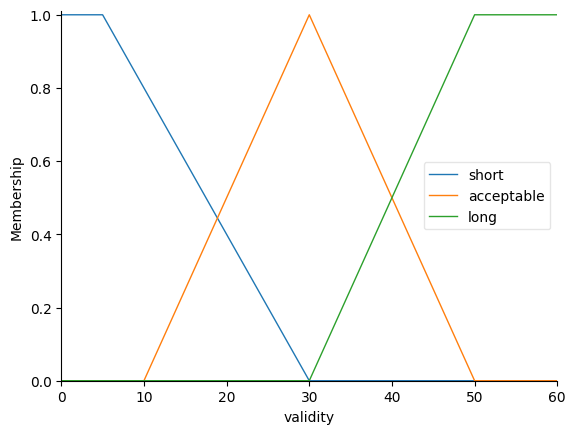

In [5]:
temperature.view()
moisture.view()
validity.view()

In [6]:
# Inferência - Regras
rule_one = ctrl.Rule(temperature['cold'] & moisture['low'], validity['long'])
rule_two = ctrl.Rule(temperature['hot'] | moisture['high'], validity['short'])
rule_tree = ctrl.Rule(moisture['medium'], validity['acceptable'])

In [7]:
validity_ctrl = ctrl.ControlSystem([rule_one, rule_two, rule_tree])
validity_simulator = ctrl.ControlSystemSimulation(validity_ctrl)

In [8]:
while True :
    temp = float(input("[1] Temperatura em [0,40] °C  : "))
    if(temp<0 or temp>40) :
        print("Temperatura deve estar no intervalo de [0,40]")
        continue
    validity_simulator.input['temperature'] = temp
    break
while True :
    ur = float(input("[2] Umidade Relativa em [0, 100] %: "))
    if(ur < 0 or ur > 100) :
        print("Umidade Relativa de estar no intervalo de [0, 100]")
        continue
    validity_simulator.input['moisture'] = ur
    break
validity_simulator.compute()
print('A validade é de %d dias.' % round(validity_simulator.output['validity']))

[1] Temperatura em [0,40] °C  : 30
[2] Umidade Relativa em [0, 100] %: 20
A validade é de 10 dias.


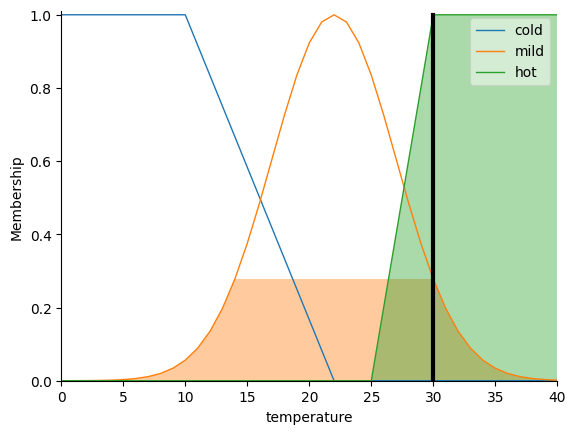

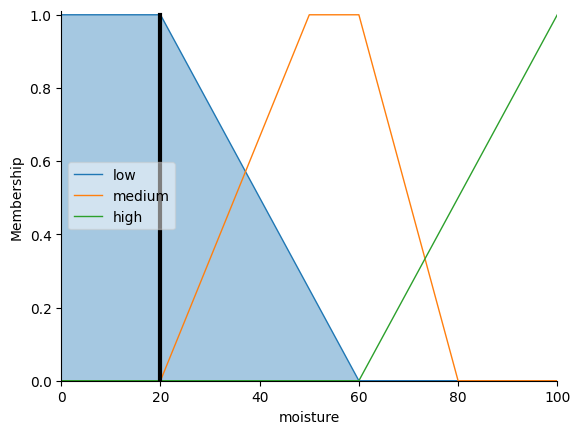

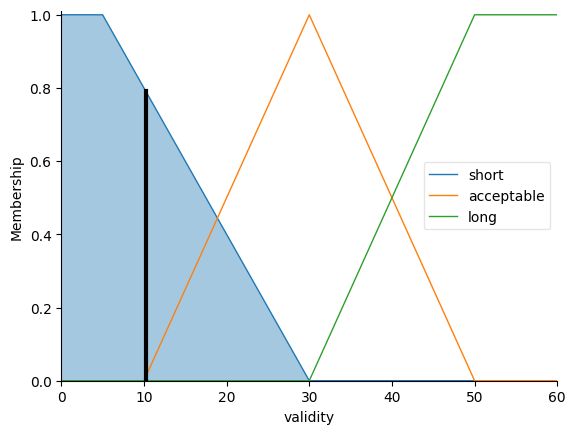

In [9]:
temperature.view(sim=validity_simulator)
moisture.view(sim=validity_simulator)
validity.view(sim=validity_simulator)

Bem interessasnte, apresenta uma descrição rapida sobre a logica fuzzy e implementa os valores com um input.